In [1]:
# Import necessary libraries
from deap import algorithms, base, creator, tools
import random
import matplotlib.pyplot as plt

# Step 1: Define the problem (Maximizing the sum of bits)

# Create fitness class (maximize)
creator.create("FitnessMax", base.Fitness, weights=(1.0,))   #Creates a Fitness class for maximizing a value

# Create individual class (list of bits)
creator.create("Individual", list, fitness=creator.FitnessMax) 
#Creates Individual class based on list,but also attaches fitness attribute.


In [2]:
# Step 2: Set up the toolbox
toolbox = base.Toolbox()   #Toolbox: Stores all your operations (generate individuals, mutate, etc).

# Attribute generator: define how to initialize one gene (either 0 or 1)
toolbox.register("attr_int", random.randint, 0, 1)

# Structure initializers
# Define 'individual' to be a list of 100 random 0s and 1s
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=100)

# Define 'population' to be a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [3]:
# Step 3: Define the evaluation function
#Evaluation: Sum up all the 1s (more 1s = better fitness). Return as tuple because DEAP expects that.

def evalOneMax(individual):
    return sum(individual),  # Comma makes it a tuple

toolbox.register("evaluate", evalOneMax)   #Tell DEAP to use this function to evaluate individuals.

# Register the genetic operators
toolbox.register("mate", tools.cxTwoPoint)            # Crossover
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)  # Mutation (flip each bit with probability 0.05)
toolbox.register("select", tools.selTournament, tournsize=3)  # Selection (tournament of size 3)

gen	nevals	avg    	min	max
0  	300   	50.4933	34 	64 
1  	181   	54.8333	44 	66 
2  	191   	58.4567	47 	68 
3  	199   	60.9533	52 	68 
4  	167   	62.96  	47 	71 
5  	175   	64.99  	57 	73 
6  	168   	66.9333	58 	74 
7  	187   	68.9167	59 	76 
8  	171   	70.8867	62 	76 
9  	155   	72.69  	62 	80 
10 	171   	74.1233	64 	82 
11 	191   	75.64  	65 	82 
12 	171   	77.18  	69 	84 
13 	173   	78.7667	69 	84 
14 	185   	79.9067	72 	86 
15 	205   	81.4433	72 	88 
16 	163   	82.6767	74 	88 
17 	175   	83.6833	76 	88 
18 	181   	84.8067	74 	90 
19 	179   	85.6233	74 	91 
20 	178   	86.58  	78 	91 
21 	173   	87.2533	78 	91 
22 	155   	88.06  	79 	92 
23 	187   	88.37  	80 	92 
24 	184   	89.2767	82 	94 
25 	198   	89.7767	80 	95 
26 	185   	90.6233	80 	96 
27 	160   	91.62  	82 	96 
28 	182   	92.45  	83 	97 
29 	171   	93.2933	84 	97 
30 	184   	94.1433	84 	97 
31 	161   	94.91  	85 	98 
32 	181   	95.4633	85 	99 
33 	177   	96.02  	88 	99 
34 	182   	96.7733	88 	99 
35 	177   	97.0433	86 	100
3

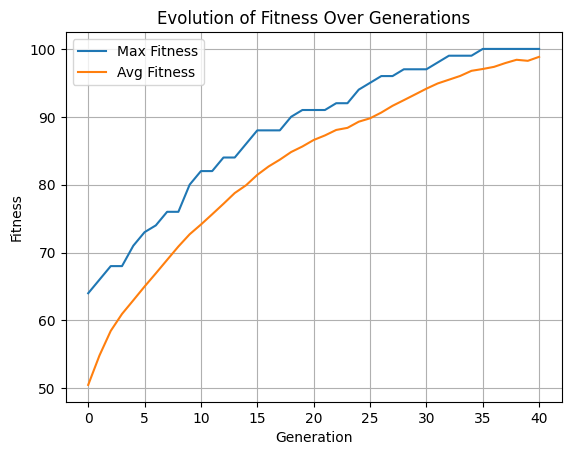

In [4]:
# Step 4: Main program
def main():
    random.seed(64)  # For reproducibility
    
    # Create an initial population of 300 individuals
    pop = toolbox.population(n=300)
    
    # Define statistics to be collected Track average, minimum, and maximum fitness at each generation.


    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", lambda x: sum(v[0] for v in x) / len(x))
    stats.register("min", lambda x: min(v[0] for v in x))
    stats.register("max", lambda x: max(v[0] for v in x))
    
    # Run the evolutionary algorithm
    pop, logbook = algorithms.eaSimple(pop, toolbox, 
                                       cxpb=0.5,    # Crossover probability
                                       mutpb=0.2,   # Mutation probability
                                       ngen=40,     # Number of generations
                                       stats=stats, 
                                       verbose=True)
    
# eaSimple:cxpb=0.5: 50% chance for crossover.mutpb=0.2: 20% chance for mutation. ngen=40: Run for 40 generations.
# Returns:New evolved population.
#Logbook: All statistics over generations.


    
    # Print the best individual
    best_ind = tools.selBest(pop, 1)[0]
    print("\nBest Individual: ", best_ind)
    print("Fitness of Best Individual: ", best_ind.fitness.values[0])

    # Step 5: Plotting the results
    gen = logbook.select("gen")
    max_fitness_values = logbook.select("max")
    avg_fitness_values = logbook.select("avg")

    plt.plot(gen, max_fitness_values, label='Max Fitness')
    plt.plot(gen, avg_fitness_values, label='Avg Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Evolution of Fitness Over Generations')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()

each individual has 100 bits (because n=100), so:

Best possible fitness = 100